In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('data/solana_llm.graph.parquet')
# Drop the Amount column
df = df.drop('Amount', axis=1)

In [3]:
print(df.head())
print(df.tail())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

# Display DataFrame shape
print("\nDataFrame Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Display column names
print("\nColumn Names:")
print(df.columns.tolist())

# Display number of null values
print("\nNull Values Count:")
print(df.isnull().sum())

                                   AddressFrom AddressTo EdgeType  Cardinality
0  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E      AI 👾      buy            1
1  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E  ALIENCAT     sell            1
2  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E     AzumI      buy            1
3  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E    BUSTAI      buy            1
4  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E    BUSTAI     sell            1
                                         AddressFrom AddressTo EdgeType  \
3109868  zyQaEMLpS5rAVNUJRgDepcHZ6SpjvLnRxhJq83jpJuF      CETS      buy   
3109869  zynFTyMmDzk7JNoA2kSf7e7HaiCYYkkC2Dx67Zgj8TJ       TAI     sell   
3109870  zzMDjq93SXMupoeDPGr8WjagizYH91cCsVJi35HEbCr   DOGFARL      buy   
3109871  zzWD13pwRBSEVKVGQU5KHyEqfKFnLStR96cNayxWybv       EGC      buy   
3109872  zzZs83hZfKUom9rKk4ZqqqFsdyXXHxgDYx4PUiiVQMC     DRILL      buy   

         Cardinality  
3109868            1  
3109869            1  
310987

In [4]:
# Get number of unique AddressFrom
unique_from_addresses = df['AddressFrom'].nunique()
print(f"Number of unique 'AddressFrom' addresses: {unique_from_addresses}")

Number of unique 'AddressFrom' addresses: 339804


In [5]:
# Filter rows where AddressTo string length > 15
long_addresses = df[df['AddressTo'].str.len() > 15]
print(f"\nNumber of transactions with AddressTo longer than 15 characters: {len(long_addresses)}")
print("\nSample of these transactions:")
print(long_addresses.head())



Number of transactions with AddressTo longer than 15 characters: 404603

Sample of these transactions:
                                        AddressFrom  \
131072  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E   
131073  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E   
131074  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E   
131075  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E   
131076  1113SXeHzXeWhMMQohQiuuzfNjZTKGZWXwF4GYdpn3E   

                                           AddressTo  EdgeType  Cardinality  
131072  51ScEJ2jjGdtZoMwVSeKxPxfdtVQZuwdoEUddWztVnsp  transfer            1  
131073  5YSJaMeXWuSRvbMhb9irBFX4EG13jEdXMHZtxtPpgPQe  transfer            1  
131074  6niLjyx6udRvoU6qrzZChRjJU8tEXVKd86cVvnN1616Z  transfer            1  
131075  7rHcCjacfU3ZzqJzi2p1s4xQvHm4tSorYAMhQbL3g37d  transfer            1  
131076  A6ovEZiohy6gy9NwQ5bpApLN3cHCoeHLufuL8kK5FEij  transfer            1  


In [6]:
df.columns

Index(['AddressFrom', 'AddressTo', 'EdgeType', 'Cardinality'], dtype='object')

Graph Information:
Number of nodes: 395763
Number of edges: 1674792

Calculating network features for nodes...
Calculating PageRank...
Calculating clustering coefficients...
Graph is large, calculating betweenness centrality on a sample...

Calculating money laundering detection features...

Top 10 highest risk nodes:
                                              node  in_degree  out_degree  \
12664                                         WSOL      17521           0   
43180  o7RY6P2vQMuGSu1TrLM81weuzgDjaCRTXYRaXJwWcvc       5851       11942   
43340  MEVRVP9pgbLqa82bmHMoAy6X6SJUgiiqKKfhMdMsfnz       2637       13970   
13                                             SEC       5144           0   
254                                           USDC       2858           0   
3719                                      DogAi16z        941           0   
1178                                           PTR       3222           0   
2197                                        ROSSAI       2386   

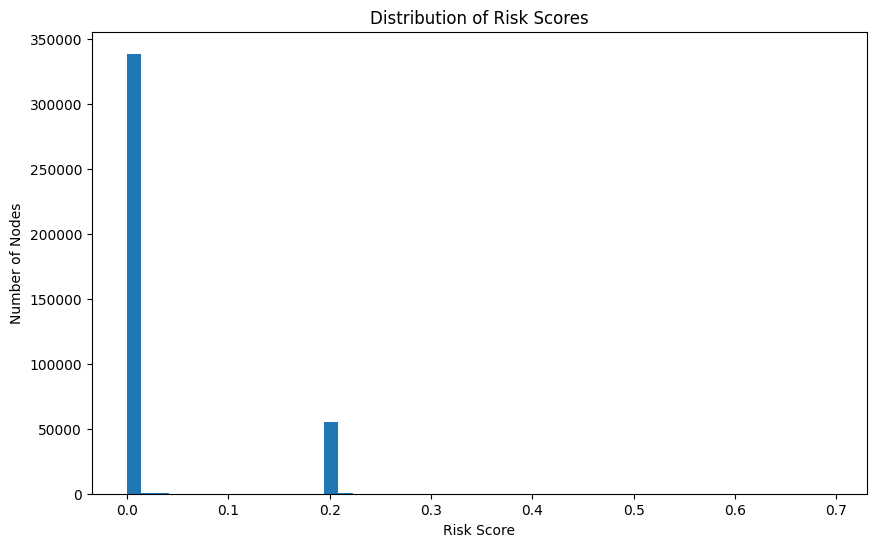

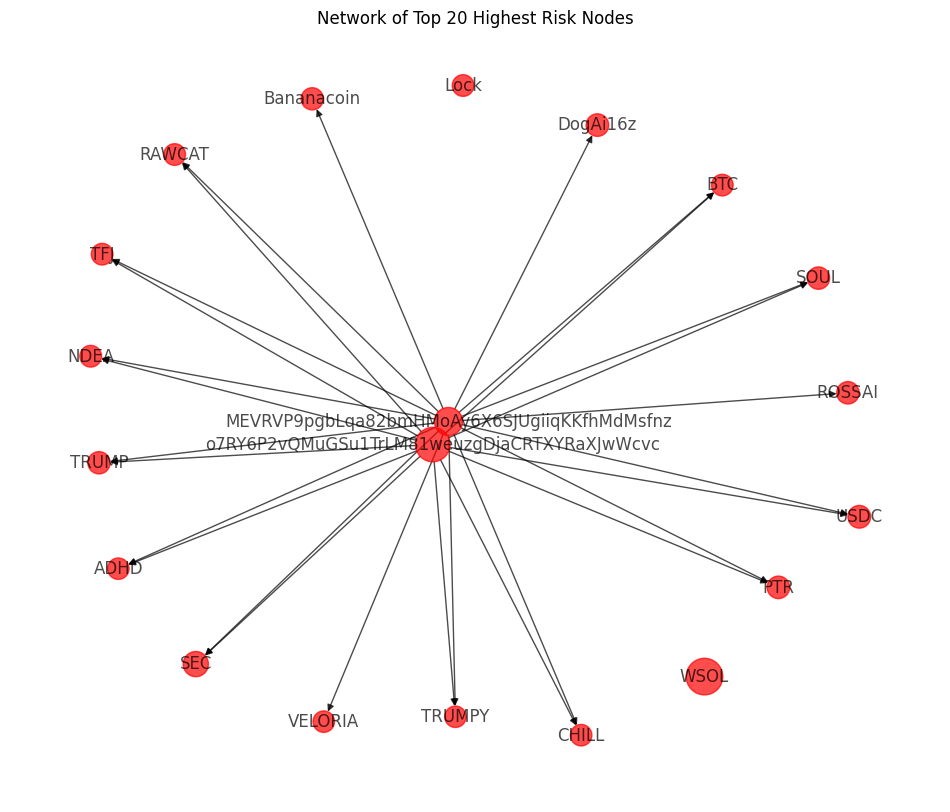


Node features saved to 'node_features_for_ml_detection.csv'


In [7]:
# Create a graph representation of the transactions
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the dataframe
for _, row in df.iterrows():
    G.add_edge(row['AddressFrom'], row['AddressTo'], 
               edge_type=row['EdgeType'], 
               cardinality=row['Cardinality'])

# Print basic graph information
print(f"Graph Information:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Calculate network features for each node
print("\nCalculating network features for nodes...")

# Initialize dictionaries to store features
in_degree = {}
out_degree = {}
total_degree = {}
in_amount = {}
out_amount = {}
net_flow = {}
clustering_coef = {}
pagerank = {}
betweenness = {}

# Calculate basic network metrics
for node in G.nodes():
    in_degree[node] = G.in_degree(node)
    out_degree[node] = G.out_degree(node)
    total_degree[node] = G.in_degree(node) + G.out_degree(node)
    
    # Calculate total incoming and outgoing amounts
    incoming_edges = list(G.in_edges(node, data=True))
    outgoing_edges = list(G.out_edges(node, data=True))
    
    in_amount[node] = sum(edge[2]['cardinality'] for edge in incoming_edges) if incoming_edges else 0
    out_amount[node] = sum(edge[2]['cardinality'] for edge in outgoing_edges) if outgoing_edges else 0
    net_flow[node] = in_amount[node] - out_amount[node]

# Calculate more complex network metrics (may take time for large networks)
print("Calculating PageRank...")
pagerank = nx.pagerank(G, alpha=0.85)

# Calculate clustering coefficient on the undirected version of the graph
print("Calculating clustering coefficients...")
G_undirected = G.to_undirected()
clustering_coef = nx.clustering(G_undirected)

# Calculate betweenness centrality for a sample of nodes if the graph is large
if G.number_of_nodes() > 1000:
    print("Graph is large, calculating betweenness centrality on a sample...")
    betweenness = nx.betweenness_centrality(G, k=100)  # Use sampling
else:
    print("Calculating betweenness centrality...")
    betweenness = nx.betweenness_centrality(G)

# Create a dataframe with node features
node_features = pd.DataFrame({
    'node': list(G.nodes()),
    'in_degree': [in_degree.get(node, 0) for node in G.nodes()],
    'out_degree': [out_degree.get(node, 0) for node in G.nodes()],
    'total_degree': [total_degree.get(node, 0) for node in G.nodes()],
    'in_amount': [in_amount.get(node, 0) for node in G.nodes()],
    'out_amount': [out_amount.get(node, 0) for node in G.nodes()],
    'net_flow': [net_flow.get(node, 0) for node in G.nodes()],
    'clustering_coefficient': [clustering_coef.get(node, 0) for node in G.nodes()],
    'pagerank': [pagerank.get(node, 0) for node in G.nodes()],
    'betweenness': [betweenness.get(node, 0) for node in G.nodes()]
})

# Calculate additional money laundering detection features
print("\nCalculating money laundering detection features...")

# 1. Transaction velocity (rate of transactions)
transaction_count = {}
for node in G.nodes():
    transaction_count[node] = in_degree[node] + out_degree[node]

# 2. Calculate transaction patterns
# Ratio of incoming to outgoing transactions
in_out_ratio = {}
for node in G.nodes():
    if out_degree[node] > 0:
        in_out_ratio[node] = in_degree[node] / out_degree[node]
    else:
        in_out_ratio[node] = float('inf') if in_degree[node] > 0 else 0

# 3. Identify circular transactions
# This is a simplified approach - for a full analysis, more complex cycle detection would be needed
has_self_loop = {}
for node in G.nodes():
    has_self_loop[node] = G.has_edge(node, node)

# 4. Calculate transaction amount features
avg_in_amount = {}
avg_out_amount = {}
for node in G.nodes():
    incoming_edges = list(G.in_edges(node, data=True))
    outgoing_edges = list(G.out_edges(node, data=True))
    
    avg_in_amount[node] = (sum(edge[2]['cardinality'] for edge in incoming_edges) / len(incoming_edges)) if incoming_edges else 0
    avg_out_amount[node] = (sum(edge[2]['cardinality'] for edge in outgoing_edges) / len(outgoing_edges)) if outgoing_edges else 0

# Add these features to the dataframe
node_features['transaction_count'] = [transaction_count.get(node, 0) for node in G.nodes()]
node_features['in_out_ratio'] = [in_out_ratio.get(node, 0) for node in G.nodes()]
node_features['has_self_loop'] = [has_self_loop.get(node, False) for node in G.nodes()]
node_features['avg_in_amount'] = [avg_in_amount.get(node, 0) for node in G.nodes()]
node_features['avg_out_amount'] = [avg_out_amount.get(node, 0) for node in G.nodes()]

# 5. Calculate risk scores based on known money laundering patterns
# High risk: High betweenness, high transaction count, unusual in/out ratio
node_features['risk_score'] = (
    node_features['betweenness'] / node_features['betweenness'].max() * 0.3 +
    node_features['transaction_count'] / node_features['transaction_count'].max() * 0.3 +
    (node_features['in_out_ratio'].replace([float('inf'), float('-inf')], node_features['in_out_ratio'].replace([float('inf'), float('-inf')], 0).max()) / 
     node_features['in_out_ratio'].replace([float('inf'), float('-inf')], 0).max()) * 0.2 +
    (node_features['net_flow'].abs() / node_features['net_flow'].abs().max()) * 0.2
)

# Display the top 10 highest risk nodes
print("\nTop 10 highest risk nodes:")
print(node_features.sort_values('risk_score', ascending=False).head(10))

# Visualize the distribution of risk scores
plt.figure(figsize=(10, 6))
plt.hist(node_features['risk_score'], bins=50)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Number of Nodes')
plt.show()

# Visualize a subgraph of high-risk nodes
high_risk_nodes = node_features.sort_values('risk_score', ascending=False).head(20)['node'].tolist()
high_risk_subgraph = G.subgraph(high_risk_nodes)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(high_risk_subgraph, seed=42)
node_sizes = [node_features.loc[node_features['node'] == node, 'risk_score'].values[0] * 1000 for node in high_risk_subgraph.nodes()]

nx.draw_networkx(
    high_risk_subgraph, 
    pos, 
    with_labels=True,
    node_size=node_sizes,
    node_color='red',
    alpha=0.7,
    arrows=True
)
plt.title('Network of Top 20 Highest Risk Nodes')
plt.axis('off')
plt.show()

# Save the node features for further analysis
node_features.to_csv('node_features_for_ml_detection.csv', index=False)
print("\nNode features saved to 'node_features_for_ml_detection.csv'")



--- Isolation Forest for Anomaly Detection ---
Training Isolation Forest model...

Number of nodes flagged as suspicious: 19789

Top 10 most anomalous nodes:
                                               node  risk_score  \
43301   ZG98FUCjb8mJ824Gbs6RsgVmr1FhXb2oNiJHa2dwmPd    0.167774   
43180   o7RY6P2vQMuGSu1TrLM81weuzgDjaCRTXYRaXJwWcvc    0.617697   
43340   MEVRVP9pgbLqa82bmHMoAy6X6SJUgiiqKKfhMdMsfnz    0.408169   
42559  333333rbxTJUmhRjTHeBbRnZ3snFQJs8wwabEmE9ntm6    0.126024   
43269  HnYioeXiTsjUfzJCm1G7kNgqYXkBdmWkcqcUFs7hewxf    0.089425   
44099  EJvGjsyRNYbtsdSKgMScDDJsmZcXKhWnSh19sSwK9wEn    0.130755   
42934  33GtNAQzmdq4jELpHxXYqW3vDy7fux89zevVU4hP7BTX    0.123906   
44102   Xatt2uaAnQY3tmT98EaUeRrrp1QFeCNnQrqKf1GY7cC    0.089242   
44002   feePDLmVnd4Hbzmr8jaGifj52mSM1w1yDufZvDzxMeo    0.073388   
43494  4yxRorpKtGH2ixrgMtRBMdddBpvNQwJL3vZYEjwY4LbJ    0.094200   

       anomaly_score  is_anomaly  
43301      -0.301274  Suspicious  
43180      -0.299628  Suspicious 

/home/sedittak/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128126 (\N{ALIEN MONSTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


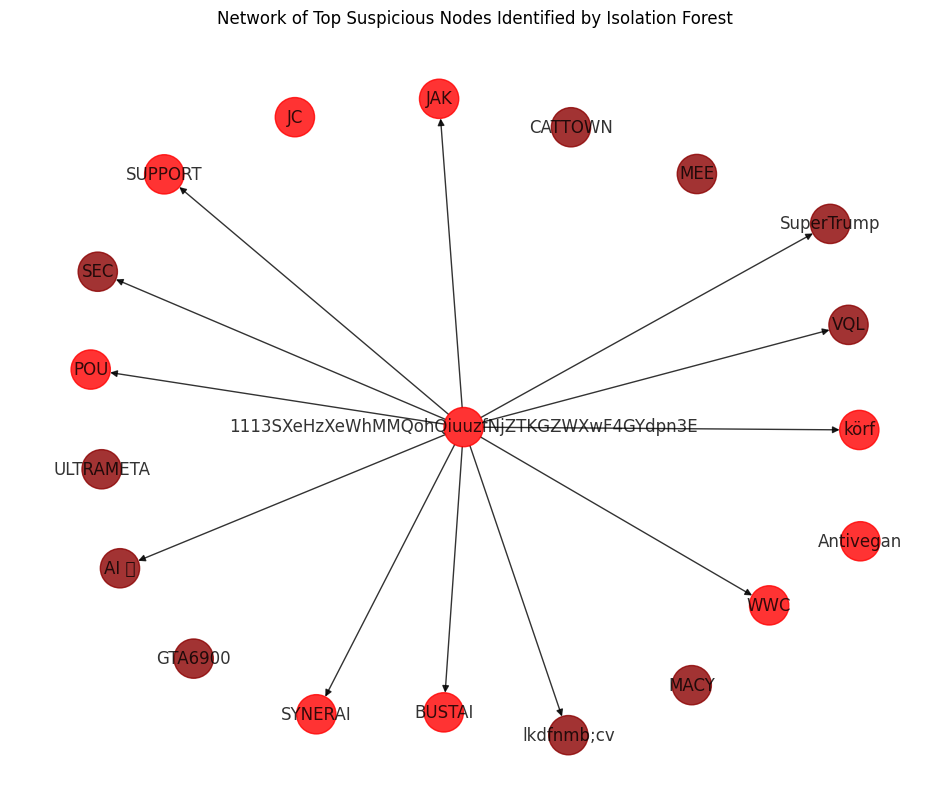


Anomaly detection results saved to 'money_laundering_detection_results.csv'


In [8]:
# Train an Isolation Forest model to identify potential money laundering activities
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

print("\n--- Isolation Forest for Anomaly Detection ---")

# Select features for anomaly detection
features_for_anomaly = ['transaction_count', 'betweenness', 'in_degree', 'out_degree', 
                        'in_out_ratio', 'net_flow', 'risk_score']

# Handle infinite values and NaNs
X = node_features[features_for_anomaly].replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest model
print("Training Isolation Forest model...")
iso_forest = IsolationForest(contamination=0.05, random_state=42)
node_features['anomaly'] = iso_forest.fit_predict(X_scaled)
node_features['anomaly_score'] = iso_forest.decision_function(X_scaled)

# Convert predictions to binary labels and scores
# -1 for anomalies (potential money laundering), 1 for normal
node_features['is_anomaly'] = node_features['anomaly'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')

# Display anomaly detection results
print("\nNumber of nodes flagged as suspicious:", (node_features['anomaly'] == -1).sum())
print("\nTop 10 most anomalous nodes:")
print(node_features.sort_values('anomaly_score').head(10)[['node', 'risk_score', 'anomaly_score', 'is_anomaly']])

# Visualize anomalies in the network
plt.figure(figsize=(12, 10))
anomaly_nodes = node_features[node_features['anomaly'] == -1]['node'].tolist()
anomaly_subgraph = G.subgraph(anomaly_nodes[:20])  # Take top 20 anomalies for visualization

pos = nx.spring_layout(anomaly_subgraph, seed=42)
node_colors = ['darkred' if node_features.loc[node_features['node'] == node, 'anomaly_score'].values[0] < -0.15 
               else 'red' for node in anomaly_subgraph.nodes()]

nx.draw_networkx(
    anomaly_subgraph, 
    pos, 
    with_labels=True,
    node_size=800,
    node_color=node_colors,
    alpha=0.8,
    arrows=True
)
plt.title('Network of Top Suspicious Nodes Identified by Isolation Forest')
plt.axis('off')
plt.show()

# Save the results
node_features.to_csv('money_laundering_detection_results.csv', index=False)
print("\nAnomaly detection results saved to 'money_laundering_detection_results.csv'")



In [9]:
# Create a clean visualization for CEO presentation
print("Creating executive-level visualization of suspicious nodes...")

# Get the suspicious nodes and their scores
suspicious_nodes = node_features[node_features['is_anomaly'] == 'Suspicious'].sort_values('anomaly_score')
top_suspicious = suspicious_nodes.head(15)  # Focus on top 15 most suspicious nodes

# Create a subgraph with these nodes and their connections
presentation_graph = nx.Graph()

# Add the suspicious nodes to the graph
for _, node_data in top_suspicious.iterrows():
    node_id = node_data['node']
    presentation_graph.add_node(node_id, **node_data)

# Add edges between suspicious nodes if they exist in the original graph
for u in presentation_graph.nodes():
    for v in presentation_graph.nodes():
        if u != v and G.has_edge(u, v):
            # Get edge data if available
            if 'Cardinality' in G.edges[u, v]:
                weight = G.edges[u, v]['Cardinality']
            else:
                weight = 1
            presentation_graph.add_edge(u, v, weight=weight)

# Also add immediate neighbors of suspicious nodes to show context
for node in list(presentation_graph.nodes()):
    for neighbor in G.neighbors(node):
        if neighbor not in presentation_graph:
            if neighbor in node_features.node.values:
                neighbor_data = node_features[node_features['node'] == neighbor].iloc[0]
                presentation_graph.add_node(neighbor, **neighbor_data)
                
                # Get edge data if available
                if 'Cardinality' in G.edges[node, neighbor]:
                    weight = G.edges[node, neighbor]['Cardinality']
                else:
                    weight = 1
                presentation_graph.add_edge(node, neighbor, weight=weight)

# Function to shorten addresses for readability
def shorten_address(address):
    if isinstance(address, str) and len(address) > 10:
        return f"{address[:6]}...{address[-4:]}"
    return address

# Create node labels with shortened addresses
node_labels = {node: shorten_address(node) for node in presentation_graph.nodes()}

# Calculate node sizes based on risk score or anomaly score
node_sizes = []
node_colors = []
for node in presentation_graph.nodes():
    node_data = node_features[node_features['node'] == node]
    if not node_data.empty:
        # Size based on risk score
        size = 300 + (abs(node_data['risk_score'].values[0]) * 500)
        
        # Color based on anomaly status
        if node_data['is_anomaly'].values[0] == 'Suspicious':
            color = '#FF3333'  # Bright red for suspicious
        else:
            color = '#AAAAAA'  # Gray for normal nodes
    else:
        size = 300
        color = '#AAAAAA'
    
    node_sizes.append(size)
    node_colors.append(color)

# Set up the plot
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(presentation_graph, seed=42, k=0.3)

# Draw edges with varying thickness based on transaction volume
edge_weights = [presentation_graph[u][v].get('weight', 1) for u, v in presentation_graph.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [1 + (w / max_weight) * 5 for w in edge_weights]

# Draw the network
nx.draw_networkx_edges(presentation_graph, pos, width=normalized_weights, alpha=0.6, edge_color='#666666')

# Draw nodes
nx.draw_networkx_nodes(
    presentation_graph, 
    pos, 
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.9,
    edgecolors='black',
    linewidths=1
)

# Add labels with custom font
nx.draw_networkx_labels(
    presentation_graph, 
    pos, 
    labels=node_labels,
    font_size=10,
    font_weight='bold',
    font_color='black'
)

# Add a title and legend
plt.title('High-Risk Transaction Network - Suspicious Entities Highlighted', 
          fontsize=20, 
          pad=20,
          fontweight='bold')

# Create a custom legend without any special characters
suspicious_patch = plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor='#FF3333', 
                            markersize=15, 
                            label='Suspicious Entity')
normal_patch = plt.Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor='#AAAAAA', 
                         markersize=15, 
                         label='Connected Entity')
size_patch = plt.Line2D([0], [0], marker='o', color='w', 
                       markerfacecolor='white', 
                       markeredgecolor='black', 
                       markersize=10, 
                       label='Size: Risk Score')
edge_patch = plt.Line2D([0], [0], color='#666666', 
                       lw=2, 
                       label='Transaction Volume')

plt.legend(handles=[suspicious_patch, normal_patch, size_patch, edge_patch], 
          loc='upper right', 
          fontsize=12,
          frameon=True,
          facecolor='white',
          edgecolor='black')

plt.axis('off')
plt.tight_layout()

# Save the figure without any special characters in the title or labels
plt.savefig('executive_risk_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


Creating executive-level visualization of suspicious nodes...


/tmp/ipykernel_1184/698327757.py:140: UserWarning: Glyph 23617 (\N{CJK UNIFIED IDEOGRAPH-5C41}) missing from current font.
  plt.savefig('executive_risk_visualization.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_1184/698327757.py:140: UserWarning: Glyph 24065 (\N{CJK UNIFIED IDEOGRAPH-5E01}) missing from current font.
  plt.savefig('executive_risk_visualization.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_1184/698327757.py:140: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig('executive_risk_visualization.png', dpi=300, bbox_inches='tight')


ValueError: 
A$$
 ^
ParseException: Expected end of text, found '$'  (at char 1), (line:1, col:2)

/home/sedittak/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23617 (\N{CJK UNIFIED IDEOGRAPH-5C41}) missing from current font.
  func(*args, **kwargs)
/home/sedittak/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24065 (\N{CJK UNIFIED IDEOGRAPH-5E01}) missing from current font.
  func(*args, **kwargs)
/home/sedittak/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x7f277a6280e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
A$$
 ^
ParseException: Expected end of text, found '$'  (at char 1), (line:1, col:2)

ValueError: 
A$$
 ^
ParseException: Expected end of text, found '$'  (at char 1), (line:1, col:2)

<Figure size 1600x1200 with 1 Axes>

Generating multi-hop money laundering pattern visualization...
Multi-hop graph has 0 nodes and 0 edges


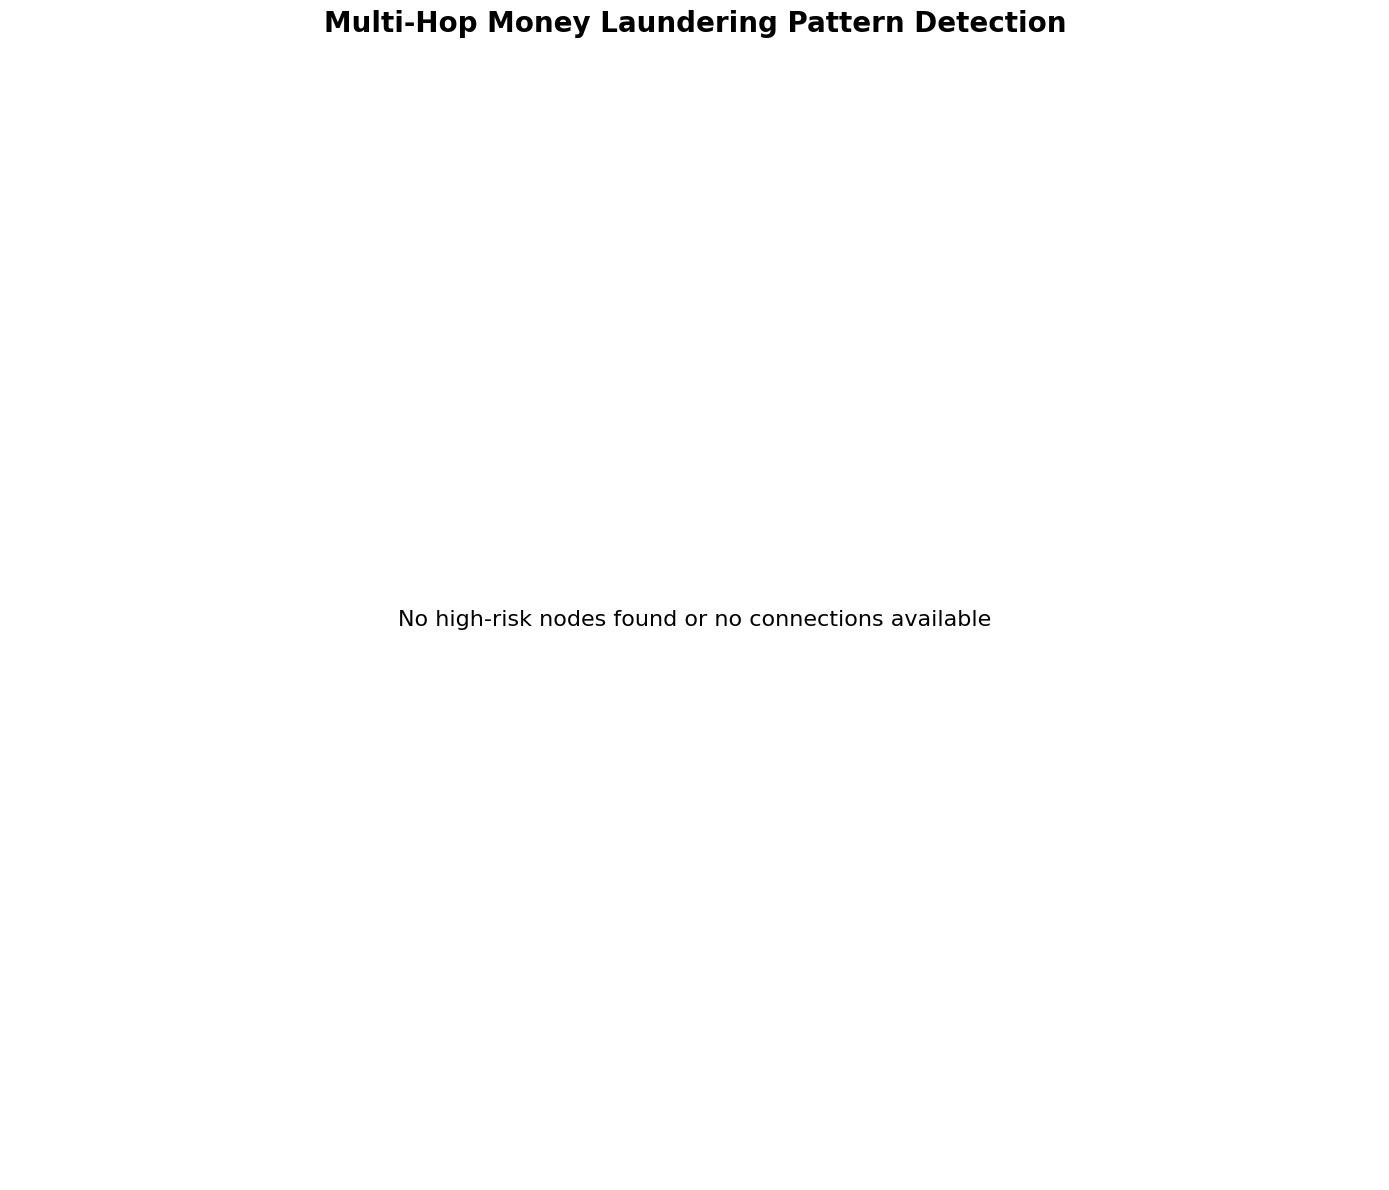

In [27]:
# Create a multi-hop visualization to better capture money laundering patterns
print("Generating multi-hop money laundering pattern visualization...")

# Create a larger graph with more hops to detect complex patterns
def create_multi_hop_graph(graph, start_nodes, max_hops=3):
    """
    Create a subgraph that includes nodes up to max_hops away from start_nodes
    """
    multi_hop_nodes = set(start_nodes)
    frontier = set(start_nodes)
    
    for hop in range(max_hops):
        new_frontier = set()
        for node in frontier:
            if node in graph:  # Check if node exists in the graph
                neighbors = set(graph.neighbors(node))
                new_frontier.update(neighbors - multi_hop_nodes)
        multi_hop_nodes.update(new_frontier)
        frontier = new_frontier
        if not frontier:
            break
    
    return graph.subgraph(list(multi_hop_nodes))

# Identify potential starting points (high-risk entities)
high_risk_nodes = [node for node, attr in G.nodes(data=True) 
                  if attr.get('risk_score', 0) > 0.7]

# Create multi-hop graph
multi_hop_graph = create_multi_hop_graph(G, high_risk_nodes, max_hops=3)
print(f"Multi-hop graph has {multi_hop_graph.number_of_nodes()} nodes and {multi_hop_graph.number_of_edges()} edges")

# Handle the case when the graph is empty
if multi_hop_graph.number_of_nodes() == 0:
    plt.figure(figsize=(14, 12))
    plt.text(0.5, 0.5, "No high-risk nodes found or no connections available", 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=16, transform=plt.gca().transAxes)
    plt.title('Multi-Hop Money Laundering Pattern Detection', fontsize=20, pad=20, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('multi_hop_money_laundering_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    # Set up the figure
    plt.figure(figsize=(14, 12))

    # Create a layout that emphasizes the flow of transactions
    pos = nx.spring_layout(multi_hop_graph, k=0.3, iterations=50, seed=42)

    # Color nodes based on hop distance from high-risk nodes
    node_colors = []
    node_sizes = []
    hop_distances = {}

    # Calculate hop distances
    for start_node in high_risk_nodes:
        if start_node in multi_hop_graph:
            lengths = nx.single_source_shortest_path_length(multi_hop_graph, start_node)
            for node, length in lengths.items():
                hop_distances[node] = min(hop_distances.get(node, float('inf')), length)

    # Set colors based on hop distance
    for node in multi_hop_graph.nodes():
        if node in high_risk_nodes:
            node_colors.append('#FF3333')  # Red for high-risk nodes
        else:
            # Color gradient based on hop distance
            distance = hop_distances.get(node, 3)
            if distance == 1:
                node_colors.append('#FF9999')  # Light red for 1-hop
            elif distance == 2:
                node_colors.append('#FFCC99')  # Orange for 2-hop
            else:
                node_colors.append('#CCCCCC')  # Gray for 3-hop
        
        # Size based on risk score and transaction volume
        risk_score = multi_hop_graph.nodes[node].get('risk_score', 0.3)
        transaction_count = sum(multi_hop_graph.edges[edge].get('weight', 1) 
                               for edge in multi_hop_graph.edges(node) if edge in multi_hop_graph.edges)
        node_sizes.append(300 * risk_score + 50 * min(transaction_count, 10))

    # Draw the multi-hop graph
    nx.draw_networkx_edges(multi_hop_graph, pos, alpha=0.6, width=1.0, edge_color='#999999')

    # Draw nodes with custom colors and sizes
    nx.draw_networkx_nodes(multi_hop_graph, pos, 
                          node_color=node_colors,
                          node_size=node_sizes,
                          alpha=0.9)

    # Add labels for high-risk nodes and their immediate neighbors
    labels = {node: multi_hop_graph.nodes[node].get('label', str(node)[:8]) 
             for node in multi_hop_graph.nodes() 
             if node in high_risk_nodes or any(neigh in high_risk_nodes for neigh in multi_hop_graph.neighbors(node))}

    nx.draw_networkx_labels(multi_hop_graph, pos, labels=labels, font_size=8, font_weight='bold')

    # Add a title and legend
    plt.title('Multi-Hop Money Laundering Pattern Detection', fontsize=20, pad=20, fontweight='bold')

    # Create a custom legend
    high_risk = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF3333', markersize=15, 
                          label='High-Risk Entity')
    one_hop = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9999', markersize=15, 
                        label='1-Hop Connection')
    two_hop = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFCC99', markersize=15, 
                        label='2-Hop Connection')
    three_hop = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#CCCCCC', markersize=15, 
                          label='3-Hop Connection')
    size_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markeredgecolor='black', 
                            markersize=10, label='Size: Risk + Volume')

    plt.legend(handles=[high_risk, one_hop, two_hop, three_hop, size_legend], 
              loc='upper right', fontsize=12, frameon=True, facecolor='white', edgecolor='black')

    # Add annotation explaining the visualization
    plt.figtext(0.5, 0.01, 
               "This visualization shows potential money laundering patterns by examining connections up to 3 hops away from high-risk entities.\n"
               "Circular patterns, parallel paths, and star formations may indicate structured laundering operations.",
               ha='center', fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

    plt.axis('off')
    plt.tight_layout()
    plt.savefig('multi_hop_money_laundering_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()
